In [9]:
#importing keras

from tensorflow import keras



#laoding the data
(x_train_full,y_train_full) , (x_test,y_test) =  keras.datasets.mnist.load_data()


In [11]:
#split the data into train and validation with scaling them

x_valid, x_train = x_train_full[:5000]/ 255.,x_train_full[5000:] / 255.
y_valid, y_train =y_train_full[:5000], y_train_full[5000:]
x_test =  x_test/ 255.


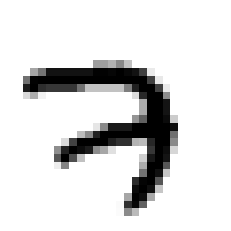

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap="binary")
plt.axis("off")
plt.show()

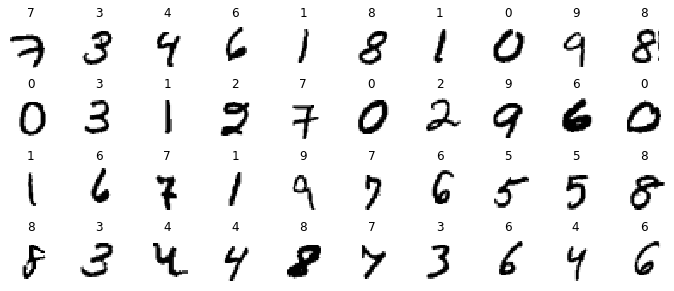

In [18]:
n_rows=4
n_cols =10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(x_train[index], cmap="binary",interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## building a simple dense network

In [32]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr,self.model.optimizer.lr * self.factor)
        

In [25]:
import numpy as np
import tensorflow as tf

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

In [35]:
history = model.fit(x_train,y_train,epochs=1,
                   validation_data=(x_valid,y_valid),
                   callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.6224 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

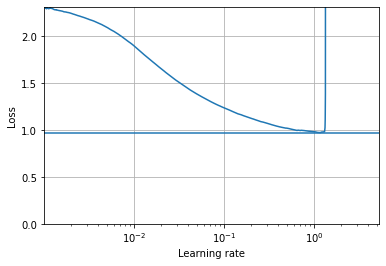

In [37]:
#plot the loss function

plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [40]:
import os

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [43]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
   1/1719 [..............................] - ETA: 0s - loss: 2.5649 - accuracy: 0.0625WARNING:tensorflow:From D:\Anaconda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2362 - accuracy: 0.9266 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0946 - accuracy: 0.9703 - val_loss: 0.0926 - val_accuracy: 0.9730
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9785 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0760 - val_accuracy: 0.9786
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/s

In [45]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 669us/step - loss: 0.0793 - accuracy: 0.0994


[0.07927846908569336, 0.09939999878406525]

In [48]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16280), started 0:01:27 ago. (Use '!kill 16280' to kill it.)